# Vector Equations

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
print('')

In [6]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

## Vectors

We're going to expand our view of what a linear system can represent.   Instead of thinking of it as a collection of equations, we are going to think about it as a __single__ equation.  This is a major shift in perspective that will open up an entirely new way of thinking about matrices.

To do that we need to introduce the idea of a __vector__.  We'll mainly talk about vectors today. We'll then return to thinking about a linear system -- now interpreted as a _vector_ equation -- in the next lecture.

A matrix with only one column is called a __column vector__, or simply a __vector__.

Here are some examples.

These are vectors in $\mathbb{R}^2$:
$$
\begin{array}{ccc}
{\bf u} = \left[\begin{array}{c}3\\-1\end{array}\right] &
{\bf v} = \left[\begin{array}{c}.2\\.3\end{array}\right] &
{\bf w} = \left[\begin{array}{c}w_1\\w_2\end{array}\right]
\end{array}
$$


These are vectors in $\mathbb{R}^3$:

$$
\begin{array}{ccc}
{\bf u} = \left[\begin{array}{c}2\\3\\4\end{array}\right] &
{\bf v} = \left[\begin{array}{c}-1\\0\\2\end{array}\right] &
{\bf w} = \left[\begin{array}{c}w_1\\w_2\\w_3\end{array}\right]
\end{array}
$$

## Vectors are Fundamental Objects

We are going to define operations over vectors, so that we can write equations in terms of vectors.  In particular, we now define how to compare vectors, add vectors, and multiply vectors __by a scalar__.

First: Two vectors are __equal__ if and only if their corresponding entries are equal.

Thus $\left[\begin{array}{c}7\\4\end{array}\right]$ and $\left[\begin{array}{c}4\\7\end{array}\right]$ are __not__ equal.

Next: Multiplying a vector by a scalar is accomplished by multiplying each entry by the scalar.

For example:
$$3 \left[\begin{array}{c}1\\-2\end{array}\right] = \left[\begin{array}{c}3\\-6\end{array}\right]$$

And finally: the sum of two vectors is the vector whose entries are the corresponding sums.

For example:

$$\left[\begin{array}{c}1\\-2\end{array}\right] + \left[\begin{array}{c}2\\5\end{array}\right] = \left[\begin{array}{c}1 + 2\\-2 + 5\end{array}\right] = \left[\begin{array}{c}3\\3\end{array}\right].$$

Note that vectors of different sizes cannot be compared or added.  For example, if ${\bf u} \in \mathbb{R}^2$ and ${\bf v} \in \mathbb{R}^3$, we cannot ask whether ${\bf u} = {\bf v}$, and ${\bf u} + {\bf v}$ is undefined.

So with these three definitions, we have all the tools to write equations using vectors.  

For example, if ${\bf u} = \left[\begin{array}{c}1\\-2\end{array}\right]$ and  ${\bf v} = \left[\begin{array}{c}2\\-5\end{array}\right]$ then 

$$ 4{\bf u} - 3{\bf v} = \left[\begin{array}{c}-2\\7\end{array}\right] $$

## Vectors Correspond to Points

As already noted, an ordered sequence of $n$ numbers can be thought of as a point in $\mathbb{R}^n$.  Hence, a vector like $\left[\begin{array}{c}-2\\-1\end{array}\right]$ (also denoted $(-2,-1)$) can be thought of as a point on the plane.

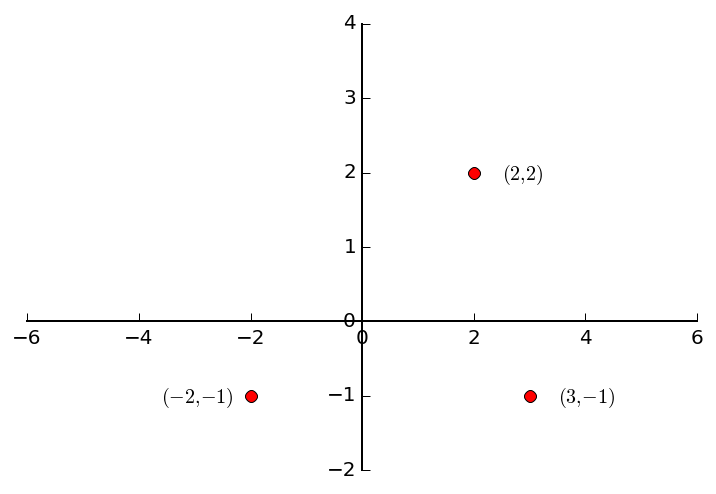

In [7]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup()
ut.centerAxes(ax)
ut.plotPoint(ax, -2,-1)
ut.plotPoint(ax, 2,2)
ut.plotPoint(ax, 3,-1)
ax.plot(0,-2,'')
ax.plot(-4,0,'')
ax.text(3.5,-1.1,'$(3,-1)$')
ax.text(2.5, 1.9, '$(2,2)$')
ax.text(-3.6, -1.1, '$(-2,-1)$')
print('')

Sometimes we draw an arrow from the origin to the point.  This comes from physics, but can be a helpful visualization in any case.

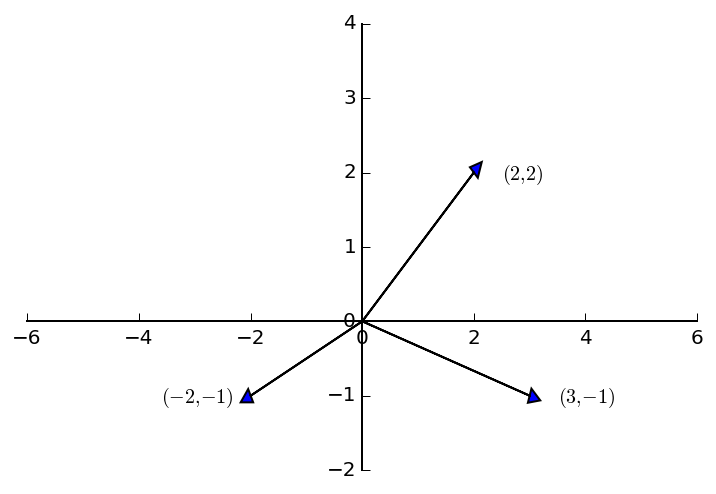

In [8]:
# No need to study this code unless you want to.
sl.hide_code_in_slideshow()
ax = ut.plotSetup()
ut.centerAxes(ax)
ax.arrow(0,0,-2,-1,head_width=0.2, head_length=0.2)
ax.arrow(0,0,2,2,head_width=0.2, head_length=0.2)
ax.arrow(0,0,3,-1,head_width=0.2, head_length=0.2)
ax.plot(0,-2,'')
ax.plot(-4,0,'')
ax.plot(0,2,'')
ax.plot(4,0,'')
ax.text(3.5,-1.1,'$(3,-1)$')
ax.text(2.5, 1.9, '$(2,2)$')
ax.text(-3.6, -1.1, '$(-2,-1)$')
print('')

## Vector Addition, Geometrically

A geometric interpretation of vector sum is as a parallelogram.  If ${\bf u}$ and ${\bf v}$ in $\mathbb{R}^2$ are represented as points in the plane, then ${\bf u} + {\bf v}$ corresponds to the fourth vertex of the parallelogram whose other vertices are ${\bf u}, 0,$ and ${\bf v}$.

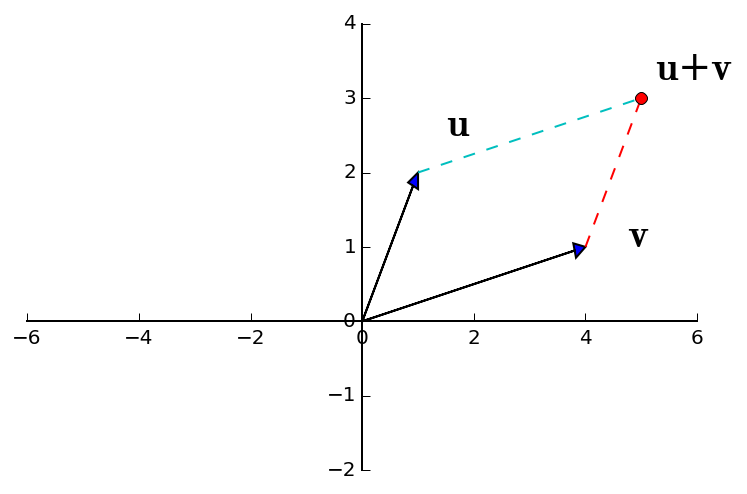

In [9]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup()
ut.centerAxes(ax)
ax.arrow(0,0,1,2,head_width=0.2, head_length=0.2,length_includes_head = True)
ax.arrow(0,0,4,1,head_width=0.2, head_length=0.2,length_includes_head = True)
ax.plot([4,5],[1,3],'--')
ax.plot([1,5],[2,3],'--')
ax.text(5.25,3.25,r'${\bf u}$+${\bf v}$',size=20)
ax.text(1.5,2.5,r'${\bf u}$',size=20)
ax.text(4.75,1,r'${\bf v}$',size=20)
ut.plotPoint(ax,5,3)
ax.plot(0,0,'')
print('')

This should be clear from the definition of vector addition (i.e., addition of corresponding elements).

## Vector Scaling, Geometrically

For a given vector ${\bf v}$ and a scalar $a$, multiplying $a$ and ${\bf v}$ corresponds to _lengthening_ $\bf v$ by a _factor_ of $a$.  So $2\bf v$ is twice as long as $\bf v$.  Multiplying by a negative value reverses the "direction" of $\bf v$.

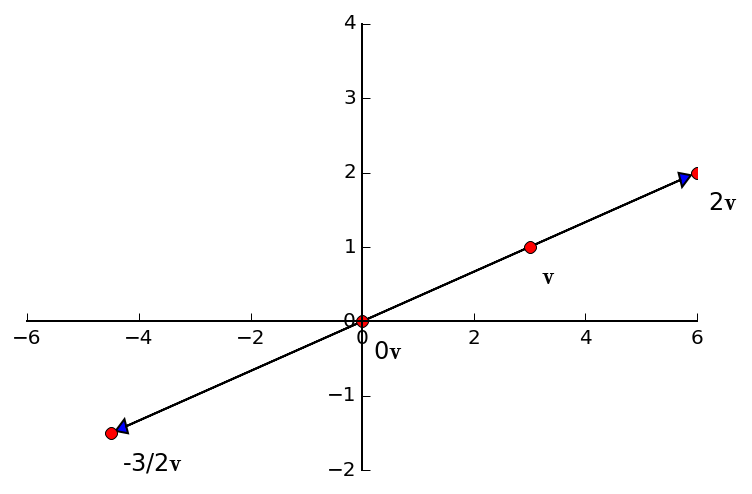

In [10]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup()
ut.centerAxes(ax)
factors = [-1.5, 0, 1, 2]
ftext = ['-3/2', '0', '', '2']
for f in factors:
    ut.plotPoint(ax, 3.0*f, f)
ax.arrow(0,0,0.95*6,0.95*2,head_width=0.2, head_length=0.2)
ax.arrow(0,0,0.94*-4.5,0.94*-1.5,head_width=0.2, head_length=0.2)
for f in range(len(factors)):
    ax.text(3.0*factors[f]+0.2, factors[f]-0.5, r'{}$\bf v$'.format(ftext[f]), size='large')
print('')

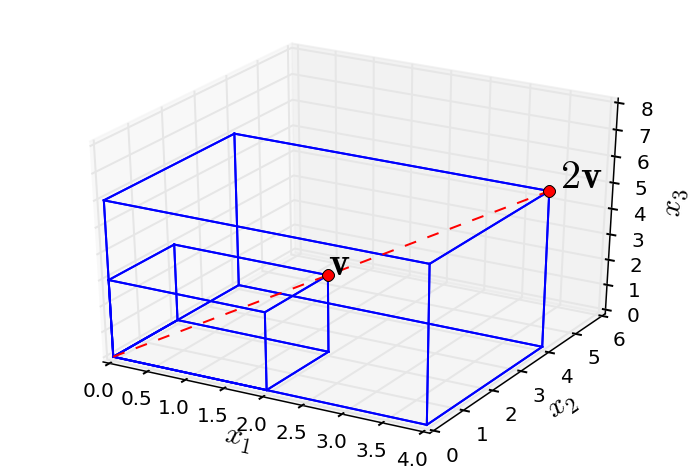

In [11]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(0,4,0,6,0,8)
ut.plotCube(ax,[2,2,3])
ut.plotCube(ax,[4,4,6])
ax.text(2,2,3,r'$\bf v$',size=20)
ax.text(4.1,4.1,6.1,r'$2\bf v$',size=20)
ax.plot([0,4],[0,4],'r--',zs=[0,6])
ax.plot([4],[4],'ro',zs=[6])
ax.plot([2],[2],'ro',zs=[3])
print('')

## Question Time! Q3.1

## The Algebra of $\mathbb{R}^n$

We've defined a new object (the vector), and it has certain algebraic properties.

1. ${\bf u} + {\bf v} = {\bf v} + {\bf u}$
2. $({\bf u} + {\bf v}) + {\bf w} = {\bf u} + ({\bf v} + {\bf w})$
3. ${\bf u} + {\bf 0} = {\bf 0} + {\bf u} = {\bf u}$
4. ${\bf u} + ({\bf -u}) = {\bf -u} + {\bf u} = {\bf 0}$
5. $c({\bf u} + {\bf v}) = c{\bf u} + c{\bf v}$
6. $(c+d){\bf u} = c{\bf u} + d{\bf u}$
7. $c(d{\bf u}) = (cd){\bf u}$
8. $1{\bf u} = {\bf u}$

You can verify each of these by from the definitions of vector addition and scalar-vector multiplication.   

## Linear Combinations

A very fundamental thing to do is to construct __linear combinations__ of vectors:

$$ {\bf y} = c_1{\bf v_1} + ... + c_p{\bf v_p} $$

The $c_i$ values are called __weights__.   Weights can be any real number, including zero.  So some examples of linear combinations are:

$$ \sqrt{3}{\bf v_1} + {\bf v_2}, $$

$$ \frac{1}{2}{\bf v_1} \;\; (= \frac{1}{2}{\bf v_1} + 0{\bf v_2}) $$
and 
$$ {\bf 0} \;\;(= 0{\bf v_1} + 0{\bf v_2}) $$

## Linear Combinations, Geometrically

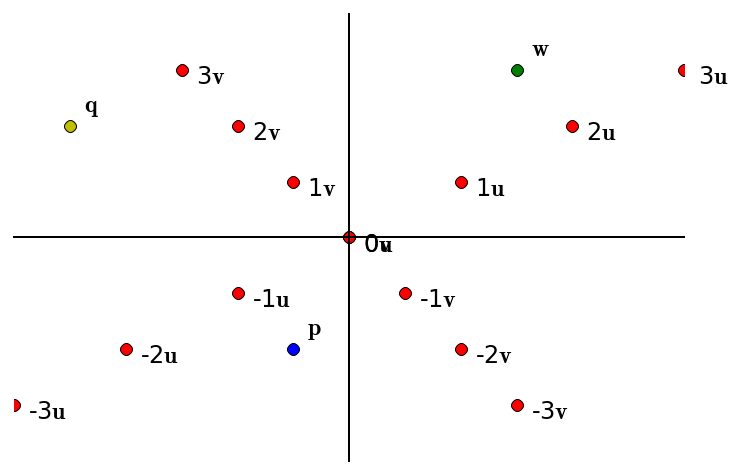

In [12]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-6, 6, -4, 4)
ut.centerAxes(ax)
ax.set_xticks([])
ax.set_yticks([])
factors = [-3, -2, -1, 0, 1, 2, 3]
u = [2, 1]
v = [-1, 1]
for f in factors:
    ut.plotPoint(ax, f*u[0], f*u[1])
    ax.text(f*u[0]+0.25,f*u[1]-0.25,r'{}$\bf u$'.format(f),size='large')
    ut.plotPoint(ax, f*v[0], f*v[1])
    ax.text(f*v[0]+0.25,f*v[1]-0.25,r'{}$\bf v$'.format(f),size='large')
ut.plotPoint(ax,2*u[0]+v[0],2*u[1]+v[1],'g')
ax.text(2*u[0]+v[0]+0.25,2*u[1]+v[1]+0.25,r'$\bf w$',size='large')
ut.plotPoint(ax,-u[0]-v[0],-u[1]-v[1],'b')
ax.text(-u[0]-v[0]+0.25,-u[1]-v[1]+0.25,r'$\bf p$',size='large')
ut.plotPoint(ax,-u[0]+3*v[0],-u[1]+3*v[1],'y')
ax.text(-u[0]+3*v[0]+0.25,-u[1]+3*v[1]+0.25,r'$\bf q$',size='large')
print('')

$${\bf w} = 2{\bf u} + {\bf v}$$

$${\bf p} = -{\bf u} - {\bf v}$$

$${\bf q} = -{\bf u} + 3{\bf v}$$

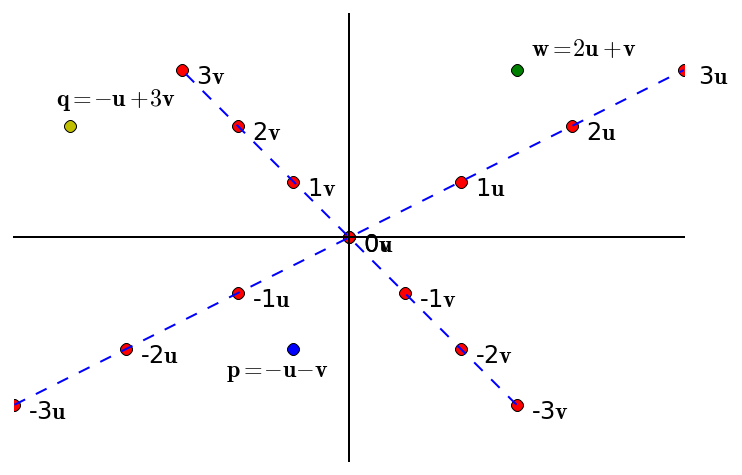

In [13]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-6, 6, -4, 4)
ut.centerAxes(ax)
ax.set_xticks([])
ax.set_yticks([])
factors = [-3, -2, -1, 0, 1, 2, 3]
u = [2, 1]
v = [-1, 1]
for f in factors:
    ut.plotPoint(ax, f*u[0], f*u[1])
    ax.text(f*u[0]+0.25,f*u[1]-0.25,r'{}$\bf u$'.format(f),size='large')
    ut.plotPoint(ax, f*v[0], f*v[1])
    ax.text(f*v[0]+0.25,f*v[1]-0.25,r'{}$\bf v$'.format(f),size='large')
ax.plot([factors[0]*u[0],factors[-1]*u[0]],[factors[0]*u[1],factors[-1]*u[1]],'b--')
ax.plot([factors[0]*v[0],factors[-1]*v[0]],[factors[0]*v[1],factors[-1]*v[1]],'b--')
ut.plotPoint(ax,2*u[0]+v[0],2*u[1]+v[1],'g')
ax.text(2*u[0]+v[0]+0.25,2*u[1]+v[1]+0.25,r'${\bf w} = 2{\bf u} + {\bf v}$',size='large')
ut.plotPoint(ax,-u[0]-v[0],-u[1]-v[1],'b')
ax.text(-u[0]-v[0]-1.2,-u[1]-v[1]-0.5,r'${\bf p} = -{\bf u} -{\bf v}$',size='large')
ut.plotPoint(ax,-u[0]+3*v[0],-u[1]+3*v[1],'y')
ax.text(-u[0]+3*v[0]-0.25,-u[1]+3*v[1]+0.35,r'${\bf q} = -{\bf u} + 3{\bf v}$',size='large')
print('')

## Question Time! Q3.2

## A Fundamental Question

We are now going to take up a very basic question that will lead us to a deeper understanding of linear systems.

Given some set of vectors ${\bf a_1, a_2, ..., a_k}$, can a given vector $\bf b$ be written as a linear combination of ${\bf a_1, a_2, ..., a_k}$?

Let's take a specific example.

Let ${\bf a_1} = \left[\begin{array}{c}1\\-2\\-5\end{array}\right], {\bf a_2} = \left[\begin{array}{c}2\\5\\6\end{array}\right],$ and ${\bf b} = \left[\begin{array}{c}7\\4\\-3\end{array}\right]$.

We need to determine whether ${\bf b}$ can be generated as a linear combination of ${\bf a_1}$ and ${\bf a_2}$.  That is, we seek to find whether weights $x_1$ and $x_2$ exist such that
$$ x_1{\bf a_1} + x_2{\bf a_2} = {\bf b}.$$

__Solution.__ We are going to convert from a __single__ vector equation to a __set__ of linear equations, that is, a __linear system.__

We start by writing the form of the solution, if it exists:

$$ x_1{\bf a_1} + x_2{\bf a_2} = {\bf b}.$$

Written out, this is:

$$ x_1 \left[\begin{array}{c}1\\-2\\-5\end{array}\right]+ x_2\left[\begin{array}{c}2\\5\\6\end{array}\right] = \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

By the definition of scalar-vector multiplication, this is:

$$\left[\begin{array}{c}x_1\\-2x_1\\-5x_1\end{array}\right]+ \left[\begin{array}{c}2x_2\\5x_2\\6x_2\end{array}\right] = \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

By the definition of vector addition, this is:

$$\left[\begin{array}{r}x_1 + 2x_2\\-2x_1 + 5x_2\\-5x_1+6x_2\end{array}\right] = \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

By the definition of vector equality, this is:

$$\begin{array}{rcl}x_1 + 2x_2&=&7\\-2x_1 + 5x_2&=&4\\-5x_1+6x_2&=&-3\end{array}.$$

We know how to solve this!  Firing up Gaussian Elimination, we first construct the augmented matrix of this system, and then find its reduced row echelon form:

$$\left[\begin{array}{rrr}1&2&7\\-2&5&4\\-5&6&-3\end{array}\right] \sim \left[\begin{array}{rrr}1&2&7\\0&9&18\\0&16&32\end{array}\right] \sim \left[\begin{array}{rrr}1&2&7\\0&1&2\\0&16&32\end{array}\right] \sim \left[\begin{array}{rrr}1&0&3\\0&1&2\\0&0&0\end{array}\right]$$

Voila!

Now, reading off the answer, we have $x_1 = 3$, $x_2 = 2$.  So we have found the solution to our original problem:

$$ 3 \left[\begin{array}{c}1\\-2\\-5\end{array}\right]+ 2\left[\begin{array}{c}2\\5\\6\end{array}\right] = \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

In other words, we have found that
$$ 3{\bf a_1} + 2{\bf a_2} = {\bf b}.$$

## A Vector Equation is a Linear System!

And vice versa!

Let's state this formally.   First, of all, recalling that vectors are columns, we can write the augmented matrix for the linear system in a very simple way.

For the vector equation  

$$x_1{\bf a_1} + x_2{\bf a_2} = {\bf b},$$ 

the corresponding linear system has augmented matrix:

$$[{\bf a_1}\;{\bf a_2}\;{\bf b}].$$

Then we can make the following statement:
    
A vector equation
$$ x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n} = {\bf b} $$

has the same solution set as the linear system whose augmented matrix is

$$ [{\bf a_1} \; {\bf a_2} \; ... \; {\bf a_n} \; {\bf b}].$$

This is a powerful concept; we have related an equation involving _columns_ to a set of equations corresponding to _rows_.

## Question Time! Q3.3

## Span

If $x_1{\bf a_1} + x_2{\bf a_2} = {\bf b},$ we say that ${\bf b}$ is in the __Span__ of the set of vectors $\{{\bf a_1}, {\bf a_2}\}.$

More generally, let's say we are given a set of vectors ${\bf v_1, ..., v_p}$ where each ${\bf v_i} \in \mathbb{R}^n.$  Then the set of all linear combinations of ${\bf v_1, ..., v_p}$ is denoted by Span$\{{\bf v_1, ..., v_p}\}$ and is called the __subset of $\mathbb{R}^n$ spanned by ${\bf v_1, ..., v_p}.$__

__Span of a single vector in $\mathbb{R}^3$__

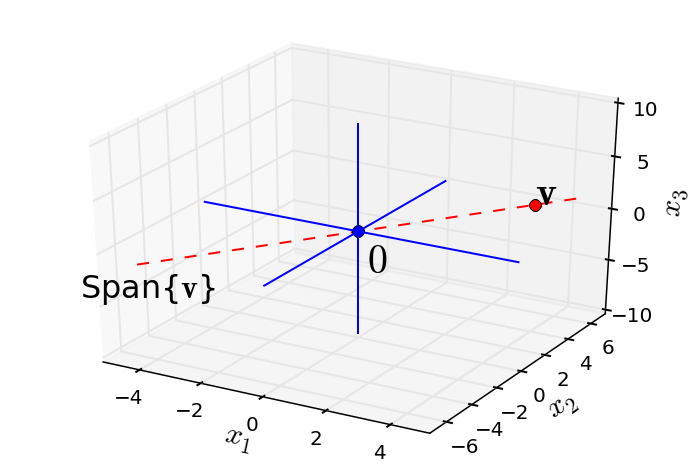

In [14]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
v = [4,4,2]
ax.text(v[0],v[1],v[2],r'$\bf v$',size=20)
ax.text(-7,-5,-7,r'Span{$\bf v$}',size=16)
ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
# this is based on the reduced echelon matrix that expresses the system whose solution is v
ut.plotIntersection3d(ax,[1,0,-v[0]/v[2],0],[0,1,-v[1]/v[2],0],'--','Red')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
print('')

__Span of two vectors in $\mathbb{R}^3$__

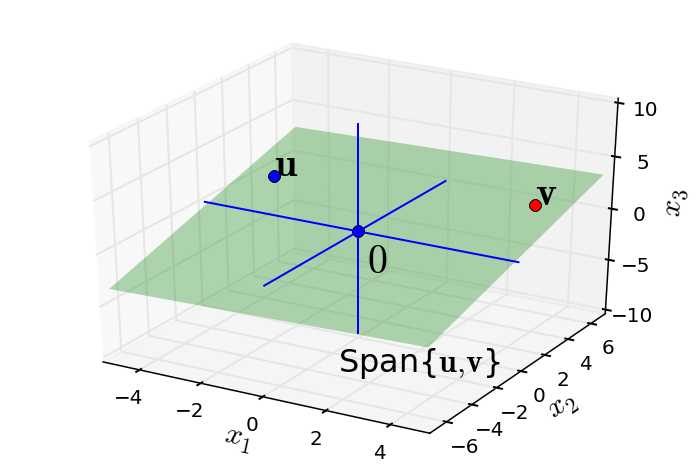

In [15]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-5,5,-7,7,-10,10)
v = [4.0,4.0,2.0]
u = [-4.0,3.0,1.0]
ax.text(v[0],v[1],v[2],r'$\bf v$',size=20)
ax.text(u[0],u[1],u[2],r'$\bf u$',size=20)
ax.text(1,-4,-10,r'Span{$\bf u,v$}',size=16)
ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'b')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
print('')

## Asking whether a vector lies within a Span

Asking whether a vector ${\bf b}$ is in Span$\{{\bf v_1, ..., v_p}\}$ is the same as asking whether the vector equation
$$x_1{\bf v_1} + x_2{\bf v_2} + \dots + x_p{\bf v_p} = {\bf b}$$ has a solution.

... which we now know is the same as asking whether the linear system with augmented matrix
$$ [{\bf v_1} \; {\bf v_2} \; ... \; {\bf v_p} \; {\bf b}]$$
has a solution.

Let ${\bf a_1} = \left[\begin{array}{c}1\\-2\\3\end{array}\right], {\bf a_2} = \left[\begin{array}{c}5\\-13\\-3\end{array}\right],$ and ${\bf b} = \left[\begin{array}{c}6\\8\\-5\end{array}\right]$.

Then Span{$\bf a_1, a_2$} is a plane through the origin in $\mathbb{R}^3$. Is $\bf b$ in that plane?

__Solution:__  Does the equation $x_1{\bf a_1} + x_2{\bf a_2} = \bf b$ have a solution?  

To answer this, consider the equivalent linear system.  Solve the system by row reducing the augmented matrix 
$$[{\bf a_1} \; {\bf a_2} \; {\bf b}]:$$

$$\left[\begin{array}{rrr}1&5&6\\-2&-13&8\\3&-3&-5\end{array}\right] \sim \left[\begin{array}{rrr}1&5&6\\0&-3&20\\0&-18&-23\end{array}\right] \sim \left[\begin{array}{rrr}1&5&6\\0&-3&20\\0&0&-143\end{array}\right]$$

The third row shows that the system has no solution.  This means that the vector equation $x_1{\bf a_1} + x_2{\bf a_2} = \bf b$ has no solution.  So ${\bf b}$ is _not_ in Span{$\bf a_1, a_2$}.

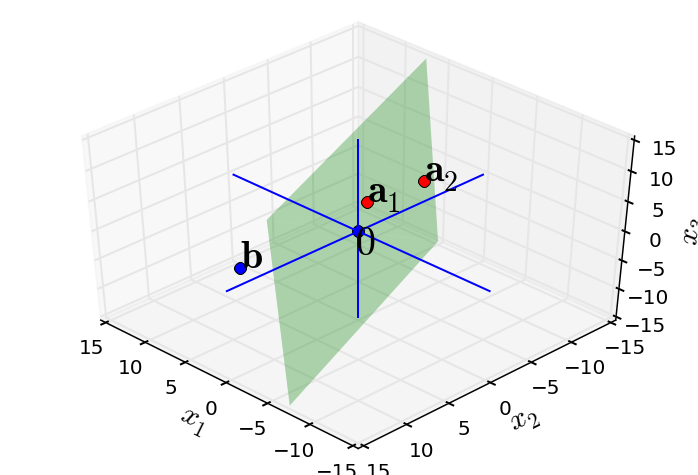

In [16]:
# to make this interactive
# in ipython qtconsole
# %matplotlib qt
# add code ax.mouse_init() below
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-15,15,-15,15,-15,15)
v = [1.0,-2.0,3.0]
u = [5.0,-13.0,-3.0]
b = [6.0, 8.0, -5.0]
ax.text(v[0],v[1],v[2],r'$\bf a_1$',size=20)
ax.text(u[0],u[1],u[2],r'$\bf a_2$',size=20)
ax.text(b[0],b[1],b[2],r'$\bf b$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a,b$}',size=16)
ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,b[0],b[1],b[2],'b')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
ax.view_init(azim=135.0,elev=43.0)
print('')

## Two Distinct Vector Spaces

Be sure to keep clear in your mind that we have been working with two different vector spaces.   One vector space is for visualizing equations that correspond to rows.   The other vector space is for visualizing vector equations.

These are two different ways of visualizing the same linear system.

Let's look at an inconsistent system both ways:

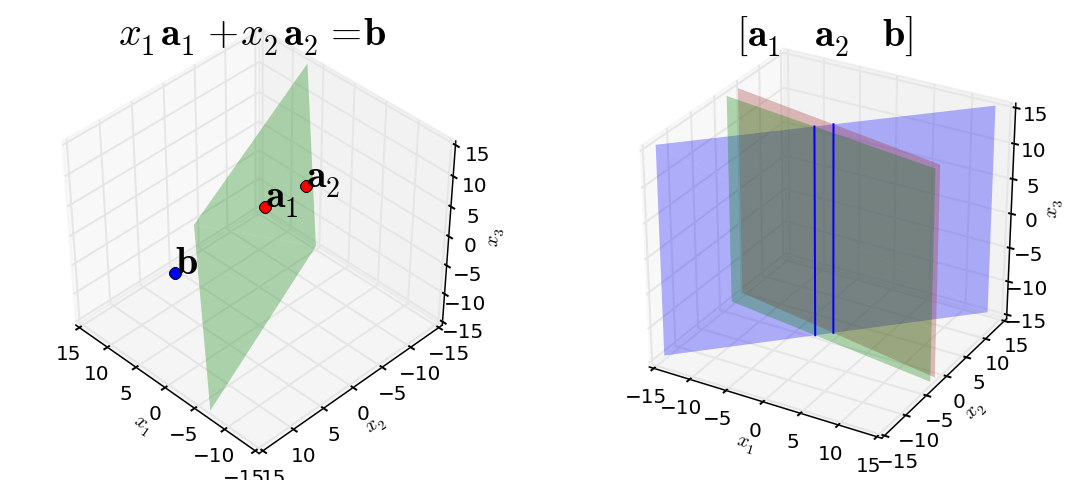

In [17]:
sl.hide_code_in_slideshow()
fig = plt.figure()
xmin = ymin = zmin = -15
xmax = ymax = zmax = 15
axs=[1,2]
axs[0] = fig.add_subplot(131, projection='3d')
axs[1] = fig.add_subplot(132, projection='3d')
for ax in axs:
    ax.axes.set_xlim([xmin, xmax])
    ax.axes.set_ylim([ymin, ymax])
    ax.axes.set_zlim([zmin, zmax])
    ax.axes.set_xlabel('$x_1$')
    ax.axes.set_ylabel('$x_2$')
    ax.axes.set_zlabel('$x_3$')
v = [1.0,-2.0,3.0]
u = [5.0,-13.0,-3.0]
b = [6.0, 8.0, -5.0]
ax = axs[0]
ax.text(v[0],v[1],v[2],r'$\bf a_1$',size=20)
ax.text(u[0],u[1],u[2],r'$\bf a_2$',size=20)
ax.text(b[0],b[1],b[2],r'$\bf b$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a,b$}',size=16)
#ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,b[0],b[1],b[2],'b')
#ut.plotPoint3d(ax,0,0,0,'b')
ax.view_init(azim=135.0,elev=43.0)
ax.set_title(r'$x_1{\bf a_1} + x_2{\bf a_2} = {\bf b}$',size=20)
##
ax = axs[1]
A = np.array([v,u,[0,0,0],b]).T
eq1 = A[0]
eq2 = A[1]
eq3 = A[2]
ut.plotLinEqn3d(ax, eq1, 'Brown')
ut.plotLinEqn3d(ax, eq2, 'Green')
ut.plotLinEqn3d(ax, eq3, 'Blue')
ut.plotIntersection3d(ax, eq1, eq3, 'Brown')
ut.plotIntersection3d(ax, eq2, eq3, 'Green')
ax.set_title(r'$[{\bf a_1}\; {\bf a_2}\; {\bf b}]$',size=20)
#ut.plotIntersection3d(ax, eq1, eq3, 'Blue')

#ax.view_init(azim=0)
#
plt.subplots_adjust(right = 2.0)